### Imports

In [1]:
import os
for dirname, _, filenames in os.walk('../HackON 2.0'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

#import matplotlib.pyplot as plt
#import seaborn as sns
#from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Text processing library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###  Importing the dataset and EDA

In [5]:
df_train = pd.read_csv('HackON 2.0/train.txt', header =None, sep = ';', names = ['Input','Sentiment'], encoding = 'utf-8')
df_test = pd.read_csv('HackON 2.0/test.txt', header = None, sep = ';', names = ['Input','Sentiment'], encoding = 'utf-8')
df_val = pd.read_csv('HackON 2.0/val.txt', header=None, sep = ';', names = ['Input','Sentiment'] , encoding = 'utf-8')

In [6]:
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [8]:
df_val.head()

,Input,Sentiment
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [9]:
df_train.shape

(16000, 2)

In [10]:
df_test.shape

(2000, 2)

In [11]:
df_val.shape

(2000, 2)

In [12]:
df_train.dtypes

Input        object
Sentiment    object
dtype: object

In [14]:
#sns.countplot(df_train.Sentiment)
#plt.show()

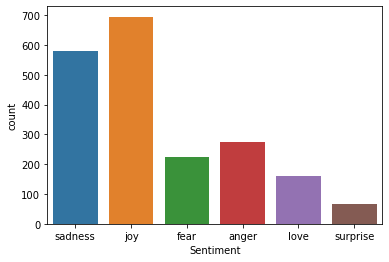

In [14]:
sns.countplot(df_test.Sentiment)
plt.show()

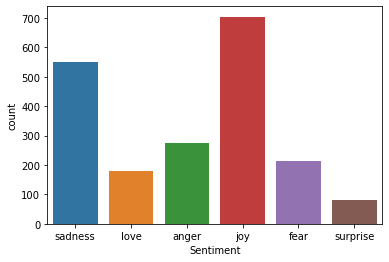

In [15]:
sns.countplot(df_val.Sentiment)
plt.show()

### Text Preprocessing

In [15]:
import text_hammer as th

In [16]:
# These are series of preprocessing
df_train['Input'] = df_train['Input'].apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_emails(x))
df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_html_tags(x))
df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_urls(x))

df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_special_chars(x))
df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_accented_chars(x))


In [18]:
df_train['Input'] = df_train['Input'].apply(lambda x: th.make_base(x)) #ran -> run

In [19]:
# These are series of preprocessing
df_test['Input'] = df_test['Input'].apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_emails(x))
df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_html_tags(x))
df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_urls(x))

df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_special_chars(x))
df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_accented_chars(x))

In [20]:
df_test['Input'] = df_test['Input'].apply(lambda x: th.make_base(x)) #ran -> run

In [21]:
df_train.head()

,Input,Sentiment
0,i do not feel humiliate,sadness
1,i can go from feel so hopeless to so damned ho...,sadness
2,i m grab a minute to post i feel greedy wrong,anger
3,i am ever feel nostalgic about the fireplace i...,love
4,i am feel grouchy,anger


In [22]:
df_test.head()

,Input,Sentiment
0,i m feeling rather rotten so i m not very ambi...,sadness
1,i m update my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i leave with my bouquet of red and yellow tuli...,joy
4,i was feel a little vain when i do this one,sadness


In [23]:
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_test['Sentiment']=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_val['Sentiment']=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

### Converting the sentences into sequences for using them in lstm

In [24]:
df_train.head()

,Input,Sentiment
0,i do not feel humiliate,3
1,i can go from feel so hopeless to so damned ho...,3
2,i m grab a minute to post i feel greedy wrong,1
3,i am ever feel nostalgic about the fireplace i...,2
4,i am feel grouchy,1


In [25]:
from keras.preprocessing.text import Tokenizer

In [55]:
num_words = 5000 
tokenizer = Tokenizer( num_words , lower=True )
df_total = pd.concat([df_train['Input'], df_test['Input']], axis = 0)
tokenizer.fit_on_texts(df_total)

In [56]:
X_train = tokenizer.texts_to_sequences(df_train['Input'])
X_test = tokenizer.texts_to_sequences(df_test['Input'])
X_val = tokenizer.texts_to_sequences(df_val['Input'])

In [57]:
vocab_size = len(tokenizer.word_index) + 1

In [58]:
vocab_size

12866

In [59]:
X_train[0]

[1, 17, 11, 2, 871]

In [60]:
def FindMaxLength(lst):
    longestList = max(lst, key = lambda i: len(i))
    maxLength = max(map(len, lst))
    return longestList, maxLength

In [61]:
print(FindMaxLength(X_train))

([1, 2, 12, 9, 2061, 14, 1480, 185, 57, 1, 15, 136, 1480, 185, 57, 1, 15, 42, 136, 1, 24, 129, 75, 1, 15, 31, 18, 360, 67, 553, 75, 84, 331, 4, 27, 205, 37, 32, 42, 162, 13, 1003, 21, 3, 1, 17, 11, 43, 164, 13, 17, 11, 210, 1, 17, 11, 103, 1, 103, 3, 103, 22, 67, 32, 615, 21, 14, 1, 15, 6, 3687], 71)


In [62]:
print(FindMaxLength(X_test))

([1, 2, 1, 24, 822, 1, 102, 185, 8, 5, 368, 1, 103, 4, 152, 5, 3923, 748, 30, 93, 30, 754, 3, 1, 103, 11, 4, 215, 82, 6, 1482, 44, 4, 118, 55, 35, 874, 27, 162, 13, 66, 69, 4, 69, 30, 64, 16, 318, 8, 283, 18, 84, 244, 4, 415, 71, 130, 111, 1483], 59)


In [63]:
print(FindMaxLength(X_val))

([1, 2, 18, 297, 3, 1, 118, 6, 179, 86, 28, 145, 98, 107, 3, 1, 103, 4, 328, 29, 5, 2708, 414, 8, 77, 3, 1, 43, 7, 1, 51, 595, 28, 1, 2, 13, 625, 12, 9, 203, 97, 366, 7, 28, 145, 1245, 21, 1, 17, 11, 1439, 5, 3422, 1, 725, 5, 179, 99], 58)


In [64]:
#Why do we use maxlen = 300

In [65]:
from keras.preprocessing.sequence import pad_sequences
X_train_pad = pad_sequences(X_train , maxlen = 100, padding = 'post')

X_test_pad = pad_sequences(X_test, maxlen = 100, padding = 'post')

X_val_pad = pad_sequences(X_val, maxlen = 100, padding = 'post')

In [66]:
X_test_pad

array([[   1,   15,   31, ...,    0,    0,    0],
       [   1,   15, 1494, ...,    0,    0,    0],
       [   1,  145,   38, ...,    0,    0,    0],
       ...,
       [   1,    2,    7, ...,    0,    0,    0],
       [   1,   15,    2, ...,    0,    0,    0],
       [   1,    2,   39, ...,    0,    0,    0]])

In [67]:
X_train_pad

array([[   1,   17,   11, ...,    0,    0,    0],
       [   1,   34,   42, ...,    0,    0,    0],
       [   1,   15, 1356, ...,    0,    0,    0],
       ...,
       [   1,    2,  297, ...,    0,    0,    0],
       [   1,    2,   14, ...,    0,    0,    0],
       [   1,   43,    6, ...,    0,    0,    0]])

In [68]:
X_val_pad

array([[ 31, 158, 259, ...,   0,   0,   0],
       [  1,   2,  14, ...,   0,   0,   0],
       [  1,   2,  14, ...,   0,   0,   0],
       ...,
       [  1,   2,  84, ...,   0,   0,   0],
       [  1, 384,   2, ...,   0,   0,   0],
       [  1,   2,  14, ...,   0,   0,   0]])

In [69]:
print(X_train_pad.shape, X_val_pad.shape, X_test_pad.shape)

(16000, 100) (2000, 100) (2000, 100)


In [70]:
from keras.utils import to_categorical
y_train = to_categorical(df_train.Sentiment.values)
y_test = to_categorical(df_test.Sentiment.values)
y_val = to_categorical(df_val.Sentiment.values)

In [71]:
print(y_train.shape,y_test.shape, y_val.shape)

(16000, 6) (2000, 6) (2000, 6)


### Building an LSTM Model

In [45]:
#from tensorflow.keras.layers import Embedding,LSTM,Dense
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense , Bidirectional
from keras.layers.embeddings import Embedding
import keras.backend as K

In [74]:
EMBEDDING_DIM = 32 # this means the embedding layer will create  a vector in 50 dimension
model = Sequential()
model.add(Embedding(num_words,
     EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1], # max_len of text sequence
                        ))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
#model.add(Dropout(0.2))
#model.add(Bidirectional(LSTM(200,return_sequences=True)))
#model.add(Dropout(0.2))
#model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 200)          106400    
_________________________________________________________________
dense_1 (Dense)              (None, 100, 6)            1206      
Total params: 267,606
Trainable params: 267,606
Non-trainable params: 0
_________________________________________________________________


In [53]:
#model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [ ]:
#model.fit(X_train_pad , y_train , batch_size = 1000 , epochs = 20 , verbose = 2 , validation_split = 0.2)

Epoch 1/20
